# Project1

## Step 1
Dependencies and Setup

In [20]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests

from scipy.stats import linregress

# from api_keys import geoapify_key

In [21]:
# Load the CSV file
df=pd.read_csv("./Resources/Kaggle/Student Loan Debt by School 2020-2021.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21370 entries, 0 to 21369
Data columns (total 13 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   index                  21370 non-null  int64  
 1   OPE ID                 21370 non-null  int64  
 2   School                 21370 non-null  object 
 3   City                   16825 non-null  object 
 4   State                  20350 non-null  object 
 5   Zip Code               16825 non-null  float64
 6   School Type            21370 non-null  object 
 7   Loan Type              21370 non-null  object 
 8   Recipients             21370 non-null  int64  
 9   # of Loans Originated  21370 non-null  int64  
 10  $ of Loans Originated  21370 non-null  int64  
 11  # of Disbursements     21370 non-null  int64  
 12  $ of Disbursements     21370 non-null  int64  
dtypes: float64(1), int64(7), object(5)
memory usage: 2.1+ MB


In [22]:
# Change data type and rename columns
df['Zip Code'] = df['Zip Code'].fillna(-1).astype(int).astype(str).replace('-1', 'NaN')
df['Recipients'] = df['Recipients'].astype(int)
df['# of Loans Originated'] = df['# of Loans Originated'].astype(int)
df['# of Disbursements'] = df['# of Disbursements'].astype(int)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21370 entries, 0 to 21369
Data columns (total 13 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   index                  21370 non-null  int64 
 1   OPE ID                 21370 non-null  int64 
 2   School                 21370 non-null  object
 3   City                   16825 non-null  object
 4   State                  20350 non-null  object
 5   Zip Code               21370 non-null  object
 6   School Type            21370 non-null  object
 7   Loan Type              21370 non-null  object
 8   Recipients             21370 non-null  int32 
 9   # of Loans Originated  21370 non-null  int32 
 10  $ of Loans Originated  21370 non-null  int64 
 11  # of Disbursements     21370 non-null  int32 
 12  $ of Disbursements     21370 non-null  int64 
dtypes: int32(3), int64(4), object(6)
memory usage: 1.9+ MB


In [23]:
df.head(10)

,index,OPE ID,School,City,State,Zip Code,School Type,Loan Type,Recipients,# of Loans Originated,$ of Loans Originated,# of Disbursements,$ of Disbursements
0,17167,1328,UNIVERSITY OF SOUTHERN CALIFORNIA,LOS ANGELES,CA,90089,Private-Nonprofit,Grad Plus,5613,5760,108725713,5760,108565375
1,8812,1509,NOVA SOUTHEASTERN UNIVERSITY-DAVIE,FORT LAUDERDALE,FL,33314,Private-Nonprofit,Unsubsidized - Graduate,8663,8707,106710999,8710,106710999
2,19883,22333,"ST. GEORGE'S UNIVERSITY, SCHOOL OF MEDICINE",NaN,NaN,NaN,Foreign-For-Profit,Grad Plus,3045,3183,153948017,3186,103155983
3,8619,1328,UNIVERSITY OF SOUTHERN CALIFORNIA,LOS ANGELES,CA,90089,Private-Nonprofit,Unsubsidized - Graduate,8662,8726,100481022,8728,100481022
4,18071,2785,NEW YORK UNIVERSITY,NEW YORK,NY,10012,Private-Nonprofit,Grad Plus,4200,4537,154068506,4537,84427896
5,10132,20530,LIBERTY UNIVERSITY,NaN,VA,NaN,Private-Nonprofit,Unsubsidized - Graduate,12390,12662,232387661,12662,82298123
6,17360,1509,NOVA SOUTHEASTERN UNIVERSITY-DAVIE,FORT LAUDERDALE,FL,33314,Private-Nonprofit,Grad Plus,4322,4511,109115098,4511,74111085
7,8586,1074,GRAND CANYON UNIVERSITY,PHOENIX,AZ,85017,Proprietary,Unsubsidized - Graduate,9635,9639,139108046,9876,73987720
8,9336,32673,CAPELLA UNIVERSITY,MINNEAPOLIS,MN,55402,Proprietary,Unsubsidized - Graduate,16211,21120,258601543,21164,73762493
9,4311,1081,ARIZONA STATE UNIVERSITY,TEMPE,AZ,85287,Public,Unsubsidized - Undergraduate,26078,26732,143877613,26732,73170602


In [24]:
df.describe()

,index,OPE ID,Recipients,# of Loans Originated,$ of Loans Originated,# of Disbursements,$ of Disbursements
count,21370.000000,21370.000000,21370.000000,21370.000000,2.137000e+04,21370.000000,2.137000e+04
mean,10684.500000,16201.447824,327.571221,336.351006,2.552457e+06,341.877679,1.278388e+06
std,6169.131962,15479.675287,1026.847813,1057.889512,8.464158e+06,1078.516745,4.298032e+06
min,0.000000,1002.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000e+00
25%,5342.250000,2848.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000e+00
50%,10684.500000,8447.500000,10.000000,10.000000,5.841800e+04,10.000000,2.873850e+04
75%,16026.750000,30837.000000,188.750000,192.000000,1.430073e+06,197.000000,7.090422e+05
max,21369.000000,42933.000000,26663.000000,27261.000000,2.586015e+08,27261.000000,1.085654e+08


## Step 2
### Ask the questions

State, What is the breakdown of number of collages in each state? P

State, What is the breakdown of recipients of Student Loans by State (by quantity and by $)?P

State, What states have the most (public schools? Private schools?) recipients?P

State, What are the top 10 states with the most student loans?L

Geographic, How does the average student loan vary by zip code?M

Geographic, Are there trends based on geographic region or type of school?T

Loan Type, What is the breakdown of type of student loan  (subsidized, unsubsidized, grad plus, parent plus, etc.)?M

In [25]:
df.columns

Index(['index', 'OPE ID', 'School', 'City', 'State', 'Zip Code', 'School Type',
       'Loan Type', 'Recipients', '# of Loans Originated',
       '$ of Loans Originated', '# of Disbursements', '$ of Disbursements'],
      dtype='object')

In [26]:
# Breakdown by 5 loan types of the number of loans distributed, the total amount of those loans and the number of recipients - GOOD!
loan_type = df.groupby("Loan Type")[["Recipients", "# of Disbursements", "$ of Disbursements"]].sum()


def format_with_commas(x):
    if isinstance(x, (int, float)):
        return "{:,.0f}".format(x)
    return x

# Below is code to format the three columns    

# loan_type['Recipients'] = loan_type['Recipients'].apply(format_with_commas)

# loan_type['# of Disbursements'] = loan_type['# of Disbursements'].apply(format_with_commas)

# loan_type['$ of Disbursements'] = loan_type['$ of Disbursements'].apply(format_with_commas)

loan_type

#loan_type_amounts = df.groupby('Loan Type')['# of Disbursements'].sum()
#loan_type_amounts

,Recipients,# of Disbursements,$ of Disbursements
Loan Type,,,
Grad Plus,290765,312189,3751925629
Parent Plus,420715,432083,3819328361
Subsidized,2607417,2677884,5335392322
Unsubsidized - Graduate,909824,970234,8649219445
Unsubsidized - Undergraduate,2771476,2913536,5763289607


C:\Users\mdrco\AppData\Local\Temp\ipykernel_4596\2084640987.py:17: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().set_yticklabels(y_values)


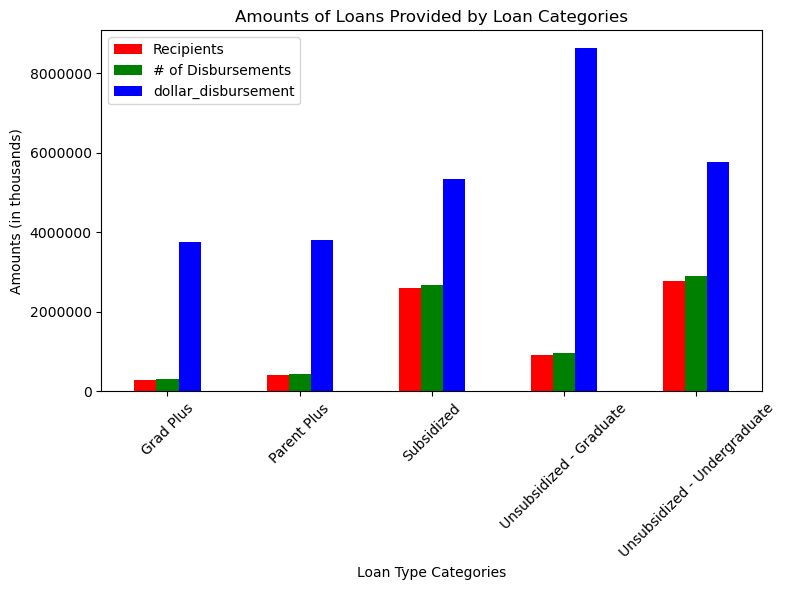

In [32]:
# A Bar Chart Displaying the amounts and numbers of loans provided by the 5 loan categories - GOOD!
import matplotlib.pyplot as plt

# Assuming df is already prepared
df['dollar_disbursement'] = df["$ of Disbursements"] / 1000  # Convert to millions for plotting
loan_type = df.groupby("Loan Type")[["Recipients", "# of Disbursements", "dollar_disbursement"]].sum()

ax = loan_type.plot(kind="bar", color=["red", "green", "blue"], figsize=(8,6))

plt.xlabel("Loan Type Categories")
plt.ylabel("Amounts (in thousands)") 
plt.title("Amounts of Loans Provided by Loan Categories")

plt.ticklabel_format(useOffset=False, style="plain", axis="y")

y_values = [int(label) for label in plt.gca().get_yticks()]
plt.gca().set_yticklabels(y_values)

# # Adjust y-ticks
# ax.set_yticklabels([int(val) for val in ax.get_yticks()])

plt.xticks(rotation=45)
plt.tight_layout()

plt.show()

In [43]:
#Determine the average amount of loans per Loan Tyoe - NEEDS MORE WORK!!

#loan_type_avg = df.groupby("Loan Type").mean()[["# of Disbursements", "$ of Disbursements"]]

loan_type_avg = df.groupby("Loan Type")[["# of Disbursements","$ of Disbursements"]].mean()

#average = df.groupby(level='Category1')[['Value1', 'Value2']].mean()

# def format_with_commas(x):
#     if isinstance(x, (int, float)):
#         return "{:,.0f}".format(x)
#     return x

# loan_type_avg ['# of Disbursements'] = loan_type_avg['# of Disbursements'].apply(format_with_commas)

# loan_type_avg['$ of Disbursements'] = loan_type_avg['$ of Disbursements'].apply(format_with_commas)

loan_type_avg

,# of Disbursements,$ of Disbursements
Loan Type,,
Grad Plus,73,"877,849"
Parent Plus,101,"893,619"
Subsidized,627,"1,248,337"
Unsubsidized - Graduate,227,"2,023,683"
Unsubsidized - Undergraduate,682,"1,348,453"


C:\Users\mdrco\AppData\Local\Temp\ipykernel_4596\2717331709.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  loan_type = df.groupby("Loan Type")["# of Disbursements", "dollar_disbursement"].mean()


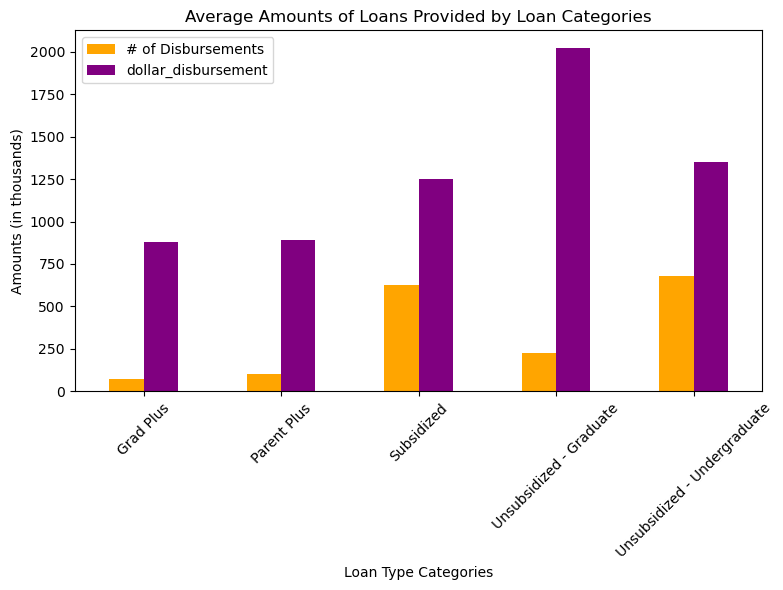

In [30]:
# A Bar Chart that displays the average numbers of loans dispersed and the average - NEEDS MORE WORK!!
# Based on data above that needs more work.

df['dollar_disbursement'] = df["$ of Disbursements"] / 1000  # Convert to millions for plotting
loan_type = df.groupby("Loan Type")["# of Disbursements", "dollar_disbursement"].mean()

ax = loan_type.plot(kind="bar", color=[ "orange", "purple"], figsize=(8,6))

plt.xlabel("Loan Type Categories")
plt.ylabel("Amounts (in thousands)") 
plt.title("Average Amounts of Loans Provided by Loan Categories")

# # Adjust y-ticks
# ax.set_yticklabels([int(val) for val in ax.get_yticks()])

plt.xticks(rotation=45)
plt.tight_layout()

In [42]:
# The top 10 zip codes where schools received the most amount of loans - LOOKS GOOD!
zipcode = df.groupby("Zip Code")["Recipients", "# of Disbursements", "$ of Disbursements"].sum()

zipcode_disbursements_most = zipcode.sort_values("$ of Disbursements", ascending=False)

zipcode_disbursements_most.head(10)



C:\Users\mdrco\AppData\Local\Temp\ipykernel_4596\2183207734.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  zipcode = df.groupby("Zip Code")["Recipients", "# of Disbursements", "$ of Disbursements"].sum()


,Recipients,# of Disbursements,$ of Disbursements
Zip Code,,,
NaN,441038,469102,2468110888
85287,69706,71530,286708163
90089,21178,21452,238572497
10012,23268,24035,219889716
16802,59280,60447,198156685
33314,17589,18212,194292452
85017,44120,45008,160814519
8901,34679,35034,154497592
19104,22993,23835,152835863


In [41]:
#The 10 zip codes where schools received the least amount of loans - LOOKS GOOD!

zipcode_disbursements_least = zipcode.sort_values("$ of Disbursements", ascending=True)

zipcode_disbursements_least.head(10)

,Recipients,# of Disbursements,$ of Disbursements
Zip Code,,,
39056,1,1,203
37138,1,1,436
90039,1,1,666
93210,1,1,750
46517,1,1,1000
18020,1,1,1178
90813,1,1,1500
84032,2,2,1504
62002,4,6,1884


School Type, What is the breakdown of student loan quantity/$ by school type (for profit, non-profit, public, etc.)?L

<!-- VS, What is the breakdown in disbursements versus loan origination $ amounts? -->

<!-- VS, Which schools have the highest disparity between loans originated and loans disbursed? -->

API, Foreign university, VS US

More datasets